In [1]:
import os
import re
import pandas as pd
import copy

# Function to parse the header and extract number of points
def parse_header(file_lines):
    for line in file_lines:
        if "SegmentSize" in line:
            return int(re.search(r"SegmentSize (\d+)", line).group(1))
    return None

# Function to extract data from a file
def extract_data(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
        num_points = parse_header(lines)
        # Find the line where data starts
        start_idx = next(i for i, line in enumerate(lines) if "Time Ampl" in line) + 1
        data_lines = lines[start_idx:start_idx + num_points]
        data = [list(map(float, line.strip().split())) for line in data_lines]
        return pd.DataFrame(data, columns=['Time', 'Amplitude'])

# Path to the directory containing the files
directory_path = '/home/addles/SDR/BRLY62'



namefile = "data3"  # nombre del archivo generado por el osciloscopio

pattern = re.compile(fr"C(\d){namefile}(\d+)\.txt")
# Dictionary to store data
data = {}

# Iterate over files in the directory
for filename in os.listdir(directory_path):
    match = pattern.match(filename)
    if match:
        channel, pulse = match.groups()
        filepath = os.path.join(directory_path, filename)
        df = extract_data(filepath)
        if channel not in data:
            data[channel] = {}
        data[channel][pulse] = df

# Example: Access data for channel 1, pulse 0001
print(data['1']['00001'])

              Time  Amplitude
0    -3.001750e-07   0.002500
1    -2.996750e-07   0.003167
2    -2.991750e-07   0.002500
3    -2.986750e-07   0.003167
4    -2.981750e-07   0.003167
...            ...        ...
1997  6.983250e-07  -0.003500
1998  6.988250e-07  -0.004167
1999  6.993250e-07  -0.003500
2000  6.998250e-07  -0.003500
2001  7.003250e-07  -0.002167

[2002 rows x 2 columns]


In [2]:
# Dividir la ruta del directorio en cada slash
parts = directory_path.split('/')

# El último elemento de la lista 'parts' es el nombre de la última carpeta
folder_name = parts[-1]

print(folder_name)

BRLY62


In [3]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def interactive_pulse_plot(data, channel):
    """
    Crea un gráfico interactivo para visualizar pulsos a partir de un diccionario de datos, usando un slider para cambiar el número de pulso.
    
    Args:
    - data (dict): Diccionario que contiene los datos de los pulsos, organizados por canal y número de pulso.
    - channel (str): Canal específico del cual se visualizarán los pulsos.
    """
    if channel not in data:
        print(f"No data available for channel {channel}.")
        return
    
    # Ordenar los pulsos y preparar el slider
    pulses = sorted(data[channel].keys())
    pulse_slider = widgets.IntSlider(value=0, min=0, max=len(pulses)-1, step=1, description='Pulse ID:')
    
    # Función para graficar el pulso seleccionado
    def plot_pulse(pulse_index):
        pulse = pulses[pulse_index]
        
        pulse_data = data[channel][pulse]
        plt.figure(figsize=(10, 5))
        plt.plot(pulse_data['Time'], pulse_data['Amplitude'], label=f"Channel {channel} Pulse {pulse}")
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.title(f"Pulse {pulse} from Channel {channel}")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Widget interactivo que ajusta la función de trazado basado en la posición del slider
    interactive_plot = widgets.interactive(plot_pulse, pulse_index=pulse_slider)
    display(interactive_plot)

# Ejemplo de uso
selected_channel = '2'  # Ajustar según tus datos
# Asegúrate de que `data` es el diccionario con los datos de pulsos, y que está estructurado correctamente
if selected_channel in data:
    interactive_pulse_plot(data, selected_channel)
else:
    print(f"No data available for Channel {selected_channel}")


interactive(children=(IntSlider(value=0, description='Pulse ID:', max=3313), Output()), _dom_classes=('widget-…

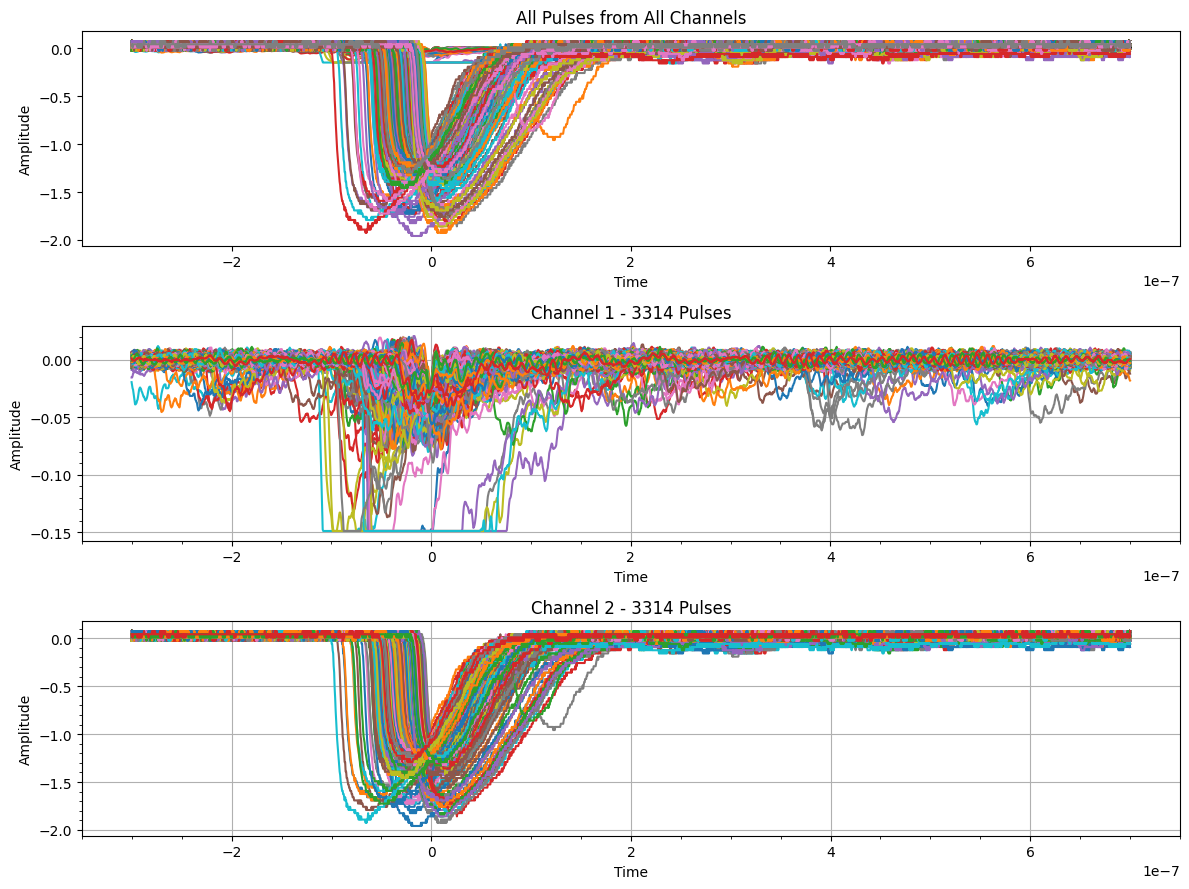

cantidad de pulsos por canal: 3314


In [4]:
import matplotlib.pyplot as plt

# Asumiendo que conocemos el número de canales o podemos obtenerlo de los datos
num_channels = len(data.keys())

# Crear una figura donde el primer subplot sea para todos los canales y luego uno por cada canal
fig, axs = plt.subplots(num_channels + 1, 1, figsize=(12, 3 * (num_channels + 1)))  # Aumentar el tamaño verticalmente para acomodar todos los subplots

# Configurar el gráfico combinado en el primer subplot
ax_combined = axs[0]
ax_combined.set_title('All Pulses from All Channels')
ax_combined.set_xlabel('Time')
ax_combined.set_ylabel('Amplitude')

### Paso 2: Plotear Datos Combinados y Luego Individuales
for channel, pulses in data.items():
    for pulse_id, df in pulses.items():
        # Trazar los mismos datos en el gráfico combinado
        ax_combined.plot(df['Time'], df['Amplitude'], label=f'Channel {channel}, Pulse {pulse_id}')

# Configurar leyendas para el gráfico combinado


### Paso 3: Plotear Datos por Canal en Subplots Individuales
for idx, (channel, pulses) in enumerate(data.items(), start=1):
    ax_individual = axs[idx]
    pulse_count = 0  # Contador de pulsos para cada canal

    for pulse_id, df in pulses.items():
        # Trazar los datos en el subplot individual
        ax_individual.plot(df['Time'], df['Amplitude'])
        pulse_count += 1  # Incrementar el contador de pulsos

    # Configurar el subplot individual
    ax_individual.set_title(f'Channel {channel} - {pulse_count} Pulses')
    ax_individual.set_xlabel('Time')
    ax_individual.set_ylabel('Amplitude')
    ax_individual.grid(True)
    ax_individual.minorticks_on()
    

### Paso 4: Ajustes Finales y Mostrar el Gráfico
plt.tight_layout()
plt.show()
# Hacer una copia profunda de 'pulses' para preservar su estado original
originalcount = copy.deepcopy(len(pulses))

# Mostrar el gráfico
print("cantidad de pulsos por canal:", originalcount)

In [5]:
umbrales = {
    '1': {'Tsatur': -0.14, 'Tthreshold': -3, 'Xthreshold': -2e-7},
    '2': {'Tsatur': -3, 'Tthreshold': -2.5, 'Xthreshold': -1e-7},
    '3': {'Tsatur': -2, 'Tthreshold': -2, 'Xthreshold': -0.5e-7},
    # Continuar según la cantidad de canales disponibles
}

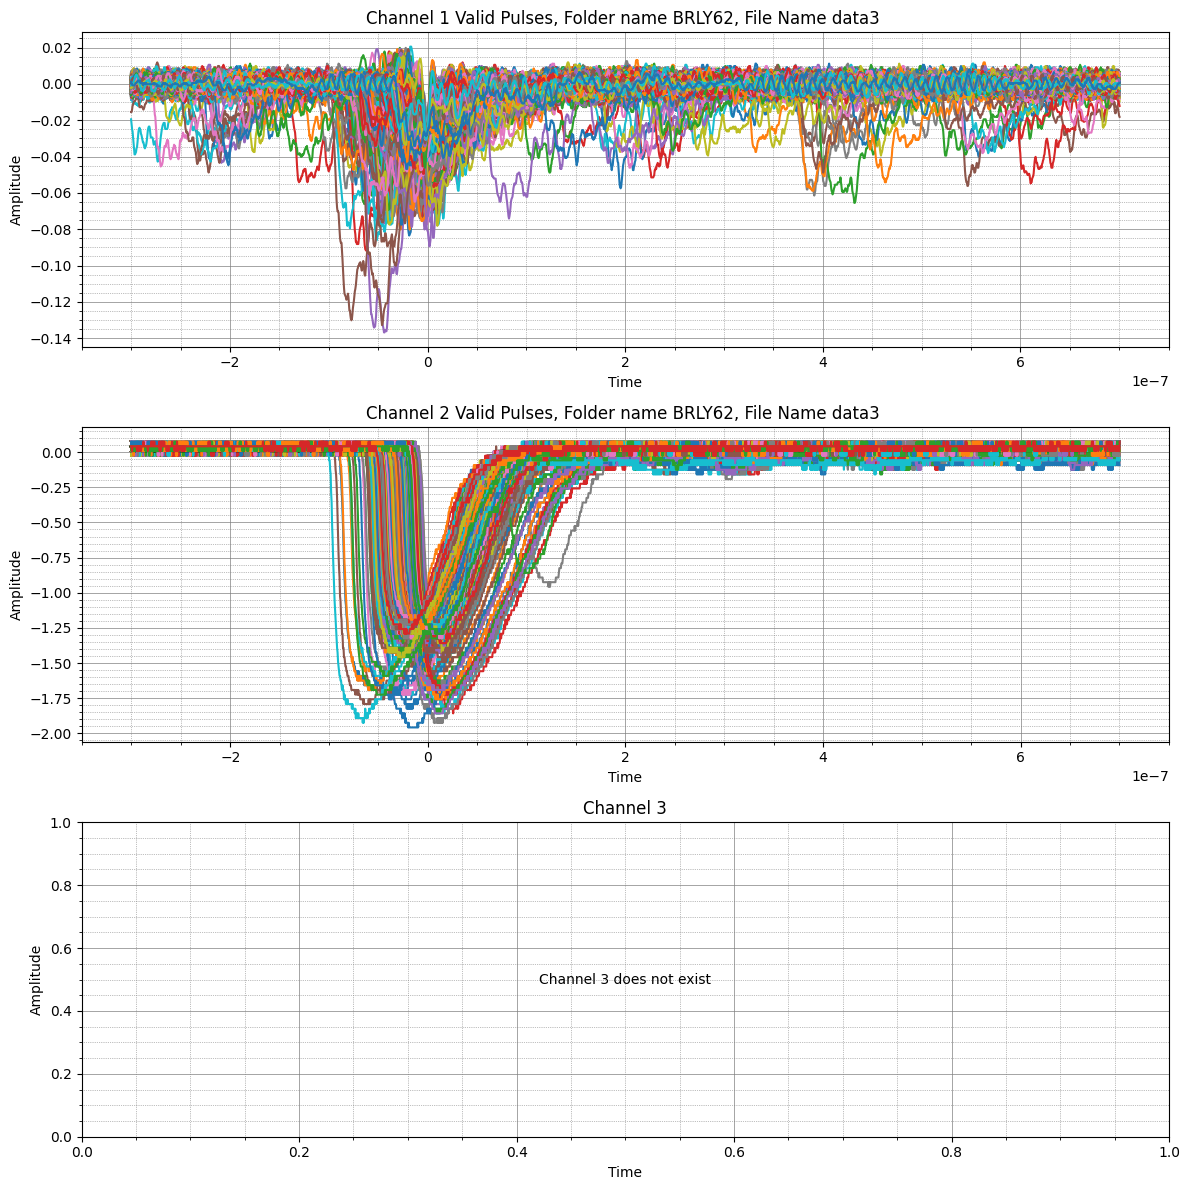

In [6]:
import matplotlib.pyplot as plt

# Determinar cuántos canales únicos hay para configurar los subplots
num_channels = len(umbrales.keys())
fig, axs = plt.subplots(num_channels, 1, figsize=(12, 4 * num_channels))

filtered_data = {}

# Asegurarse de que axs sea iterable (en caso de que haya solo un canal)
if num_channels == 1:
    axs = [axs]

# Ordenar los canales antes de iterar (asegurando un orden secuencial)
sorted_channels = sorted(umbrales.items(), key=lambda x: x[0])  # Ordenar por el nombre del canal

# Iterar sobre cada canal en los datos filtrados, ahora ordenados
for ax, (channel, channel_thresholds) in zip(axs, sorted_channels):
    if channel in data:
        # Obtener los umbrales específicos para el canal actual
        Tsatur = channel_thresholds['Tsatur']
        Tthreshold = channel_thresholds['Tthreshold']
        Xthreshold = channel_thresholds['Xthreshold']

        # Preparar un diccionario para los pulsos filtrados de cada canal si no existe
        filtered_data[channel] = {}

        # Acceder a los datos originales del canal
        for pulse_id, df in data[channel].items():
            if not (df['Amplitude'] < Tsatur).any():
                valid_pulse = True
                for i in range(len(df)):
                    if df['Time'].iloc[i] > Xthreshold:
                        break
                    if df['Amplitude'].iloc[i] < Tthreshold:
                        valid_pulse = False
                        break
                if valid_pulse:
                    filtered_data[channel][pulse_id] = df
                    ax.plot(df['Time'], df['Amplitude'])

        # Configurar las etiquetas y títulos del gráfico para cada subplot
        ax.set_title(f'Channel {channel} Valid Pulses, Folder name {folder_name}, File Name {namefile} ')
        ax.set_xlabel('Time')
        ax.set_ylabel('Amplitude')
        ax.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
        ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    else:
        ax.text(0.5, 0.5, f'Channel {channel} does not exist', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'Channel {channel}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Amplitude')
        ax.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
        ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

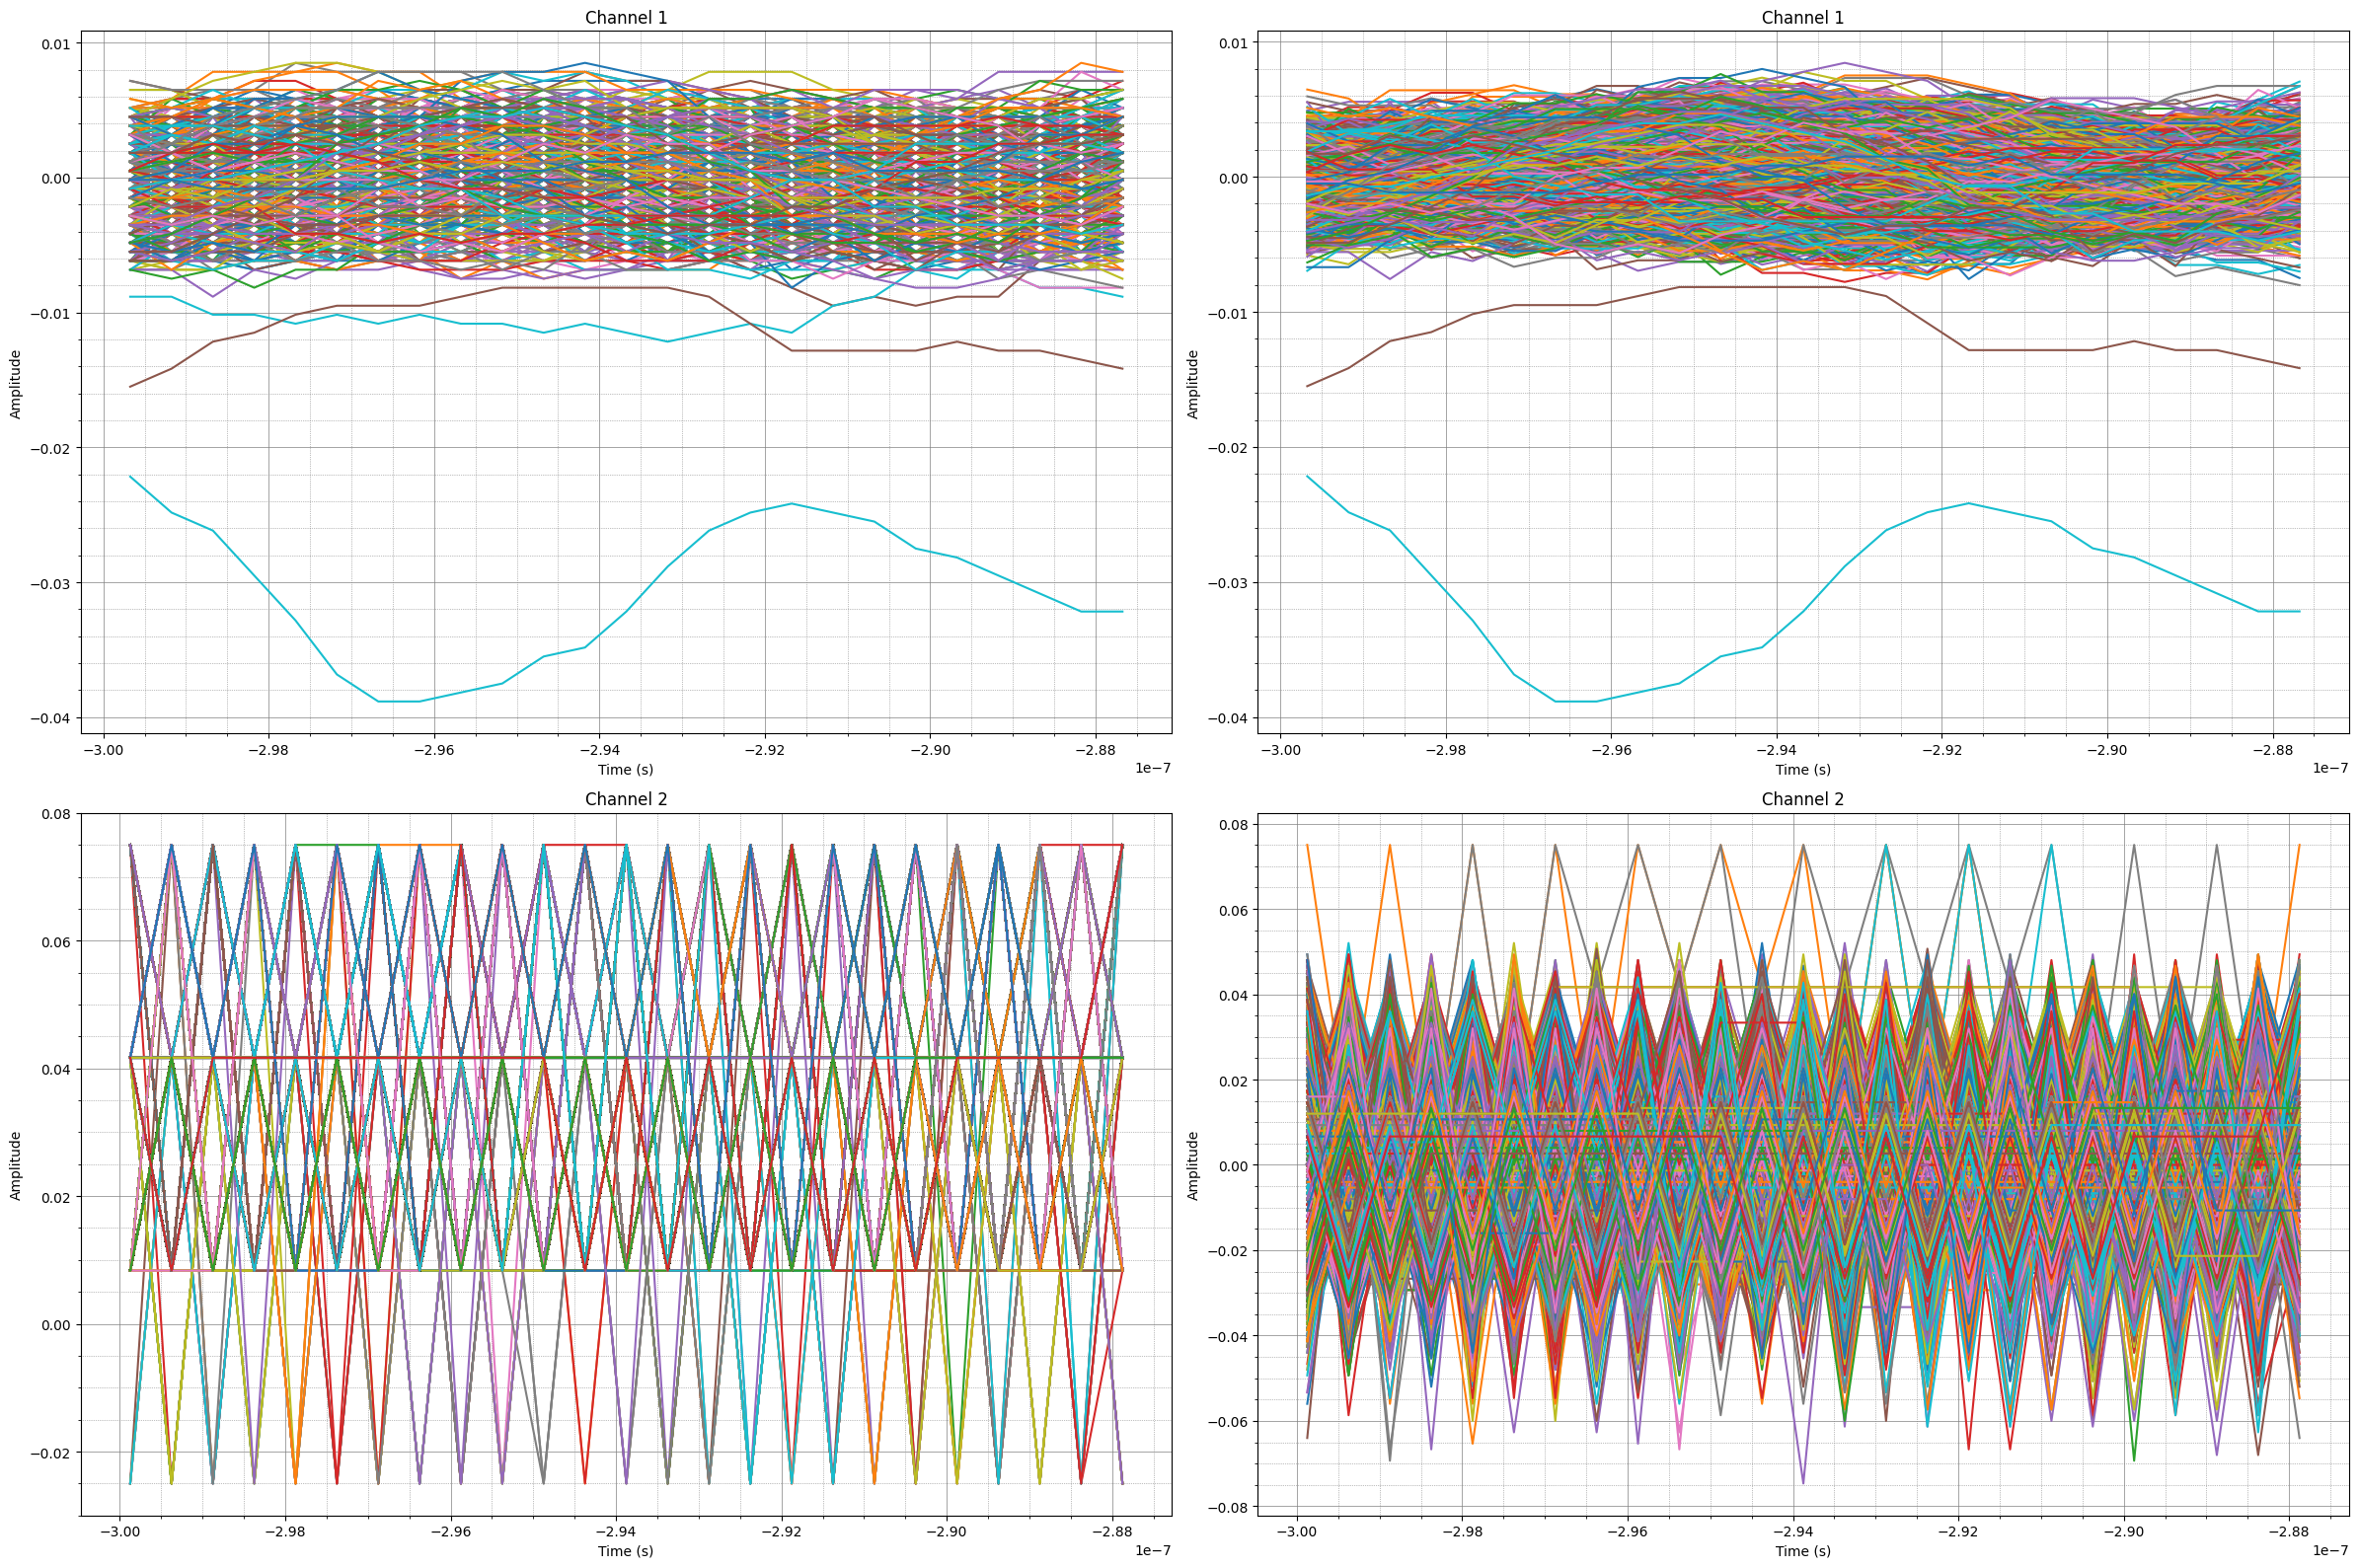

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Ventana de tiempo en la que se calculará la media
tiempo_inicial = -3e-7
ancho_ventana = 0.125e-7
tiempo_final = tiempo_inicial + ancho_ventana
# Umbral para descartar de la corrección pulsos que comienzan sin baseline
Usbaseline = -0.015

# Determinar cuántos canales únicos hay para configurar los subplots
num_channels = len(filtered_data.keys())
fig, axs = plt.subplots(num_channels, 2, figsize=(24, 8 * num_channels))  # Ajustar el tamaño según el número de canales

# Diccionario para almacenar los pulsos corregidos
corrected_data = {}

# Asegurarse de que axs sea iterable en todos los casos
if num_channels == 1:
    axs = axs.reshape(1, -1)  # Asegurarse de que axs tenga dos dimensiones

# Iterar sobre cada canal en los datos filtrados, ordenando los canales numéricamente
for ax_row, (channel, pulses) in zip(axs, sorted(filtered_data.items(), key=lambda x: int(x[0]))):
    # Preparar un diccionario para los pulsos corregidos de cada canal
    corrected_data[channel] = {}
    
    for pulse_id, df in pulses.items():
        # Encontrar índices dentro de la ventana de tiempo
        indices_ventana = (df['Time'] >= tiempo_inicial) & (df['Time'] <= tiempo_final)
        
        # Verificar el primer valor de amplitud
        if df['Amplitude'].iloc[0] < Usbaseline:
            df_corregido = df.copy()  # No se hace corrección
        else:
            # Calcular la media en la ventana especificada
            media = df.loc[indices_ventana, 'Amplitude'].mean()
            
            # Restar la media de toda la amplitud para corregir el offset
            df_corregido = df.copy()
            df_corregido['Amplitude'] -= media
        
        # Guardar el pulso corregido en el diccionario
        corrected_data[channel][pulse_id] = df_corregido

        # Trazar los datos originales y corregidos solo en la ventana de tiempo
        ax_row[0].plot(df.loc[indices_ventana, 'Time'], df.loc[indices_ventana, 'Amplitude'])
        ax_row[1].plot(df_corregido.loc[indices_ventana, 'Time'], df_corregido.loc[indices_ventana, 'Amplitude'])
    
    # Configurar las etiquetas y títulos del gráfico para cada subplot
    for ax in ax_row:
        ax.set_title(f'Channel {channel}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude')
        ax.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
        ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
       

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

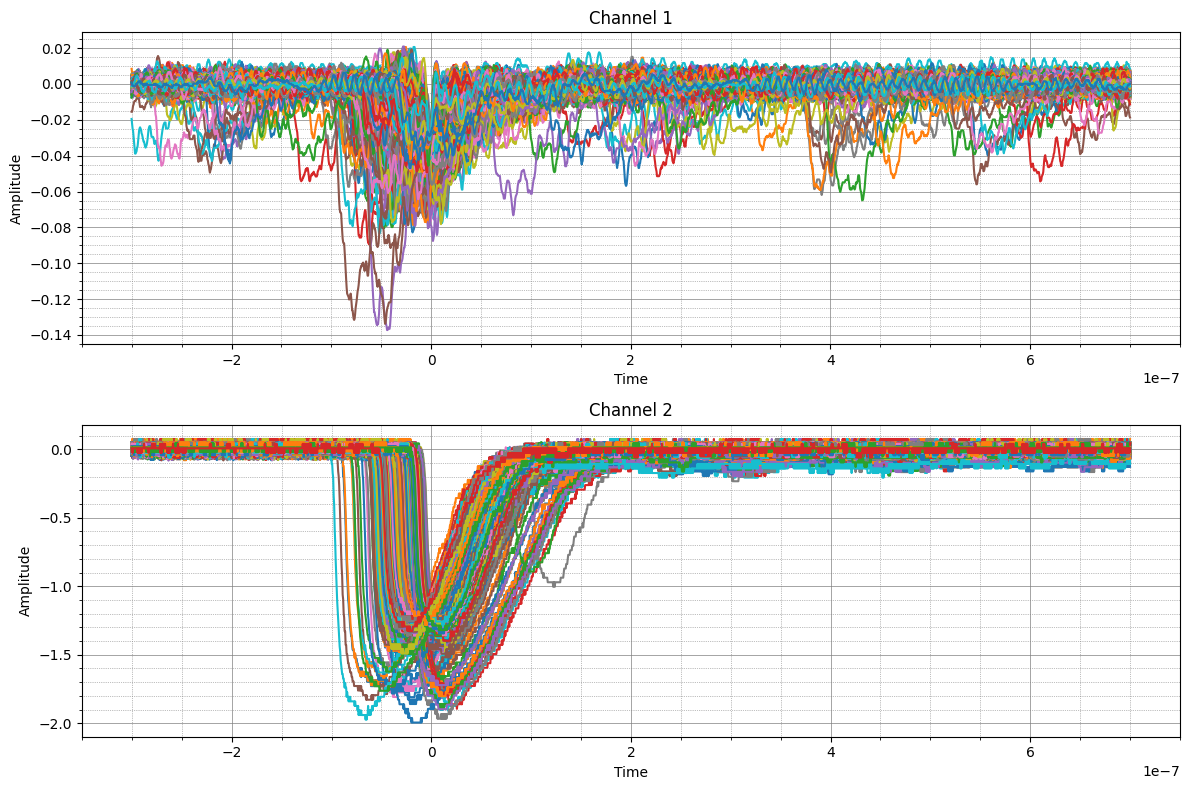

In [8]:
# Determinar cuántos canales únicos hay para configurar los subplots
num_channels = len(corrected_data.keys())
fig, axs = plt.subplots(num_channels, 1, figsize=(12, 4 * num_channels))  # Ajustar el tamaño según el número de canales

# Asegurarse de que axs sea iterable (en caso de que haya solo un canal)
if num_channels == 1:
    axs = [axs]

# Iterar sobre cada canal en los datos filtrados
for ax, (channel, pulses) in zip(axs, sorted(corrected_data.items())):
    # Iterar sobre cada pulso en el canal
    for pulse_id, df in pulses.items():
        # Trazar los datos
        ax.plot(df['Time'], df['Amplitude'])
        
    # Configurar las etiquetas y títulos del gráfico para cada subplot
    ax.set_title(f'Channel {channel}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.grid(True, which='both', linestyle='-', linewidth='0.5', color='gray')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
   

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [9]:
import pywt
import numpy as np
import pywt
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [37]:
def calculate_pulse_parameters(df, offset=1):
    min_index = np.argmin(df['Amplitude'])
    max_negative_peak = df['Amplitude'][min_index]
    peak_time = df['Time'][min_index]
    
    zero_crossings = np.where(np.diff(np.sign(df['Amplitude'])))[0]
    filtered_crossings = zero_crossings[zero_crossings < min_index]

    # Asegurar que existan cruces por cero antes del pico negativo
    if filtered_crossings.size > 0:
        zero_cross_before_peak = filtered_crossings[-1]
    else:
        zero_cross_before_peak = 0  # O manejar de otra manera si no hay cruces antes del pico
    
    start_time = df['Time'][zero_cross_before_peak]

    fifteen_percent_level = max_negative_peak + 0.85 * abs(max_negative_peak)
    rise_df = df[(df['Time'] >= start_time) & (df['Time'] <= peak_time)]
    arrival_time_indices = (rise_df['Amplitude'] <= fifteen_percent_level)
    
    if any(arrival_time_indices):
        arrival_time = rise_df['Time'][arrival_time_indices].iloc[0]
    else:
        arrival_time = start_time

    pulse_df = df[(df['Time'] > arrival_time)]
    crossings = np.where(np.diff(np.sign(pulse_df['Amplitude'] - fifteen_percent_level)))[0]
    
    if crossings.size > 0:
        if len(crossings) >= offset:
            final_index = crossings[offset - 1]
        else:
            final_index = crossings[-1]  # Usar el último cruce si no hay suficientes
        
        if final_index < len(pulse_df):  # Verificar que el índice final esté dentro del rango
            pulse_width = pulse_df['Time'].iloc[final_index] - arrival_time
        else:
            pulse_width = pulse_df['Time'].iloc[-1] - arrival_time  # Usar el último tiempo si el índice calculado es fuera de rango
    else:
        pulse_width = pulse_df['Time'].iloc[-1] - arrival_time  # No hay cruces, usar el último tiempo disponible

    return start_time, peak_time, arrival_time, pulse_width, fifteen_percent_level

In [38]:
def plot_pulses(pulse_index, offset=1):
    pulse_id = pulses[pulse_index]
    df = corrected_data[channel][pulse_id]
    pulse_params = calculate_pulse_parameters(df, offset)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df['Time'], df['Amplitude'], label=f"Pulse {pulse_id}")

    if pulse_params:
        start_time, peak_time, arrival_time, pulse_width, fifteen_percent_level = pulse_params
        # Añadir líneas y anotaciones al gráfico
        ax.axvline(x=start_time, color='green', linestyle='-', label=f'Rise Time Start: {start_time:.2e} s')
        ax.axvline(x=peak_time, color='green', linestyle='-', label=f'Rise Time End: {peak_time:.2e} s')
        ax.axvline(x=arrival_time, color='cyan', linestyle='--', label=f'Arrival Time (15%): {arrival_time:.2e} s')
        ax.hlines(y=fifteen_percent_level, xmin=arrival_time, xmax=arrival_time + pulse_width, color='red', linestyle='-', label=f'Pulse Width: {pulse_width:.2e} s')
        
        ax.legend()
        ax.grid(True)

    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"Pulse {pulse_id} from Channel {channel}")
    plt.tight_layout()
    plt.show()

In [39]:
from ipywidgets import interact, IntSlider
def interactive_pulse_plot22(corrected_data, channel):
    global pulses
    # Ordenar las claves para asegurar que los pulsos se procesen de menor a mayor
    pulses = sorted(list(corrected_data[channel].keys()), key=lambda x: int(x))  
    @interact(pulse_index=IntSlider(min=0, max=len(pulses)-1, step=1, value=0),
              offset=IntSlider(min=1, max=10, step=1, description='Nº Cruces:'))
    def update_plot(pulse_index, offset):
        plot_pulses(pulse_index, offset)

In [42]:
# Ejemplo de uso
channel = '1'  # Asegúrate de que este canal exista en tu conjunto de datos
interactive_pulse_plot22(corrected_data, channel)

interactive(children=(IntSlider(value=0, description='pulse_index', max=3300), IntSlider(value=1, description=…

In [41]:
def guardar_metricas_pulso_para_todos_los_canales(corrected_data):
    ncruces = 7  # Valor fijo para el número de cruces del ancho de pulso
    metricas_de_pulso_por_canal = {}  # Diccionario para almacenar los resultados por cada canal
    
    for channel in corrected_data.keys():
        metricas_de_pulso = {}
        pulses = sorted(list(corrected_data[channel].keys()), key=lambda x: int(x))
        
        for pulse_id in pulses:
            df = corrected_data[channel][pulse_id]
            pulse_params = calculate_pulse_parameters(df, offset=ncruces)
            tiempo_subida = pulse_params[1] - pulse_params[0]
            
            metricas_de_pulso[pulse_id] = {
                'Start Time': pulse_params[0],
                'Peak Time': pulse_params[1],
                'Arrival Time': pulse_params[2],
                'Pulse Width': pulse_params[3],
                'Fifteen Percent Level': pulse_params[4],
                'Tiempo de Subida': tiempo_subida
            }
        
        metricas_de_pulso_por_canal[channel] = metricas_de_pulso

    return metricas_de_pulso_por_canal


In [15]:
def calcular_promedios_por_canal(metricas_de_pulso_por_canal):
    promedios_por_canal = {}
    
    for channel, metricas in metricas_de_pulso_por_canal.items():
        total_tiempo_subida = sum(m['Tiempo de Subida'] for m in metricas.values())
        total_arrival_time = sum(m['Arrival Time'] for m in metricas.values())
        total_pulse_width = sum(m['Pulse Width'] for m in metricas.values())
        numero_de_pulsos = len(metricas)
        
        promedios_por_canal[channel] = {
            'Promedio Tiempo de Subida': total_tiempo_subida / numero_de_pulsos,
            'Promedio Arrival Time': total_arrival_time / numero_de_pulsos,
            'Promedio Pulse Width': total_pulse_width / numero_de_pulsos
        }

    return promedios_por_canal

In [16]:
# Calcula métricas para todos los canales
metricas_completas = guardar_metricas_pulso_para_todos_los_canales(corrected_data)

# Calcula los promedios para cada canal
promedios_de_todos_los_canales = calcular_promedios_por_canal(metricas_completas)
#print(promedios_de_todos_los_canales)  # Imprime los promedios de todos los canales si desea hacerse un analisis visual


In [17]:
def imprimir_promedios_formateados(promedios):
    for channel, stats in promedios.items():
        print(f"Canal: {channel}")
        for key, value in stats.items():
            # Formatear los números usando notación científica
            print(f"  {key}: {value:.2e} s")
        print()  # Imprime una línea en blanco para separar cada canal

# Usar la función para imprimir los resultados
imprimir_promedios_formateados(promedios_de_todos_los_canales)

Canal: 1
  Promedio Tiempo de Subida: 2.85e-08 s
  Promedio Arrival Time: -3.36e-08 s
  Promedio Pulse Width: 1.08e-07 s

Canal: 2
  Promedio Tiempo de Subida: 3.00e-08 s
  Promedio Arrival Time: -2.78e-08 s
  Promedio Pulse Width: 1.01e-07 s



In [18]:
import uproot
import numpy as np

def guardar_histogramas_en_root(metricas_completas, folder_name):
    # Crea un archivo ROOT con el nombre de la carpeta
    with uproot.recreate(f"{folder_name}.root") as f:
        # Crear un árbol con el nombre del folder
        for channel, metrics in metricas_completas.items():
            # Extraer los datos de cada métrica y crear histogramas
            #start_times = np.array([m['Start Time'] for m in metrics.values()])
            #peak_times = np.array([m['Peak Time'] for m in metrics.values()])
            arrival_times = np.array([m['Arrival Time'] for m in metrics.values()])
            pulse_widths = np.array([m['Pulse Width'] for m in metrics.values()])
            #fifteen_percent_levels = np.array([m['Fifteen Percent Level'] for m in metrics.values()])
            rise_times = np.array([m['Tiempo de Subida'] for m in metrics.values()])
            
            # Guardar histogramas en el árbol dentro de cada rama de canal
            tree = f.mkdir(f"{folder_name}/channel_{channel}")
            #tree["start_time"] = np.histogram(start_times, bins=100, range=(min(start_times), max(start_times)))
            #tree["peak_time"] = np.histogram(peak_times, bins=100, range=(min(peak_times), max(peak_times)))
            tree["arrival_time"] = np.histogram(arrival_times, bins=100, range=(min(arrival_times), max(arrival_times)))
            tree["pulse_width"] = np.histogram(pulse_widths, bins=100, range=(min(pulse_widths), max(pulse_widths)))
            #tree["fifteen_percent_level"] = np.histogram(fifteen_percent_levels, bins=100, range=(min(fifteen_percent_levels), max(fifteen_percent_levels)))
            tree["rise_time"] = np.histogram(rise_times, bins=100, range=(min(rise_times), max(rise_times)))

# Ejemplo de uso
guardar_histogramas_en_root(metricas_completas, folder_name)

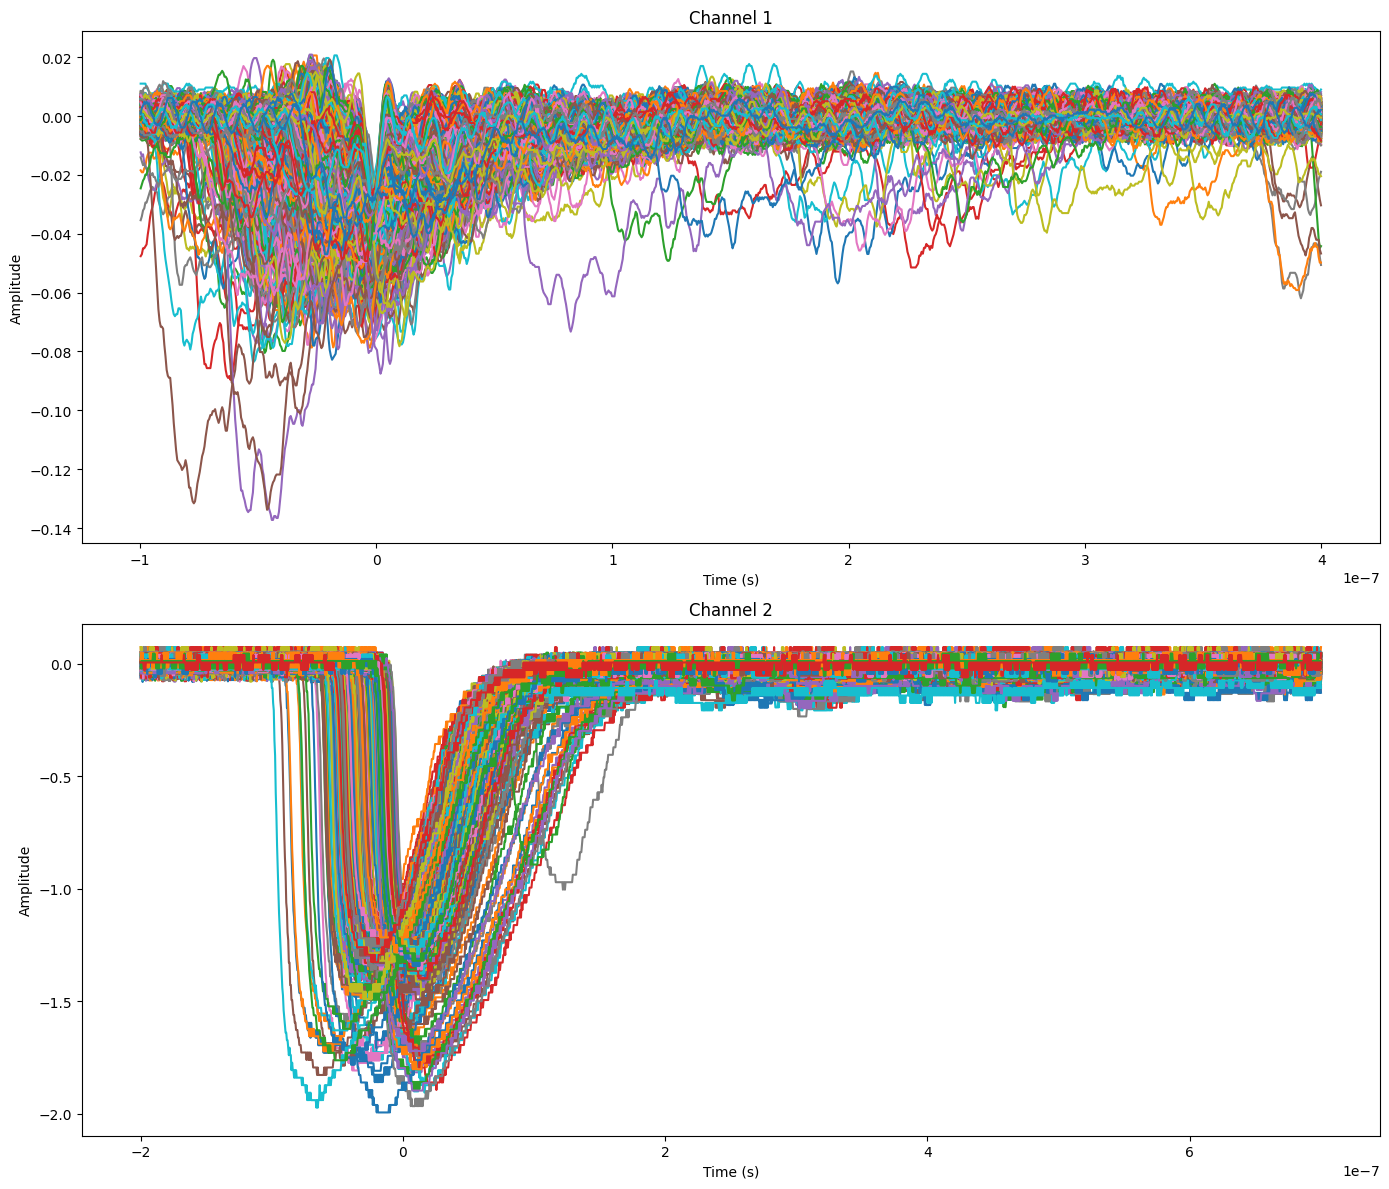

In [20]:
# Diccionario con las ventanas de tiempo para cada canal
time_windows = {
    '1': (-1e-7, 4e-7),  # Ventana para el canal 1
    '2': (-2e-7, 10e-7),
    "3": (-2e-7, 10e-7),
    "4": (-2e-7, 10e-7)## Ventana para el canal 2, puede cambiar según necesidades futuras
}

# Diccionario para almacenar los datos filtrados
window_data = {}

for channel, pulses in sorted(corrected_data.items()):
    if channel in time_windows:  # Asegurar que el canal tiene una ventana de tiempo definida
        start_time, end_time = time_windows[channel]
        window_data[channel] = {}
        for pulse_id, df in pulses.items():
            # Filtrar los datos dentro de la ventana de tiempo específica para cada canal
            filtered_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]
            window_data[channel][pulse_id] = filtered_df

# Determinar el número de canales y configurar la figura
num_channels = len(window_data)
fig, axes = plt.subplots(nrows=num_channels, ncols=1, figsize=(14, 6 * num_channels), squeeze=False)

# Iterar sobre cada canal y su correspondiente eje
for ax, (channel, pulses) in zip(axes.flatten(), window_data.items()):
    for pulse_id, df in pulses.items():
        # Trazar los datos en el eje correspondiente
        ax.plot(df['Time'], df['Amplitude'])
    # Configurar las etiquetas y título del subgráfico
    ax.set_title(f'Channel {channel}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
   

plt.tight_layout()
plt.show()

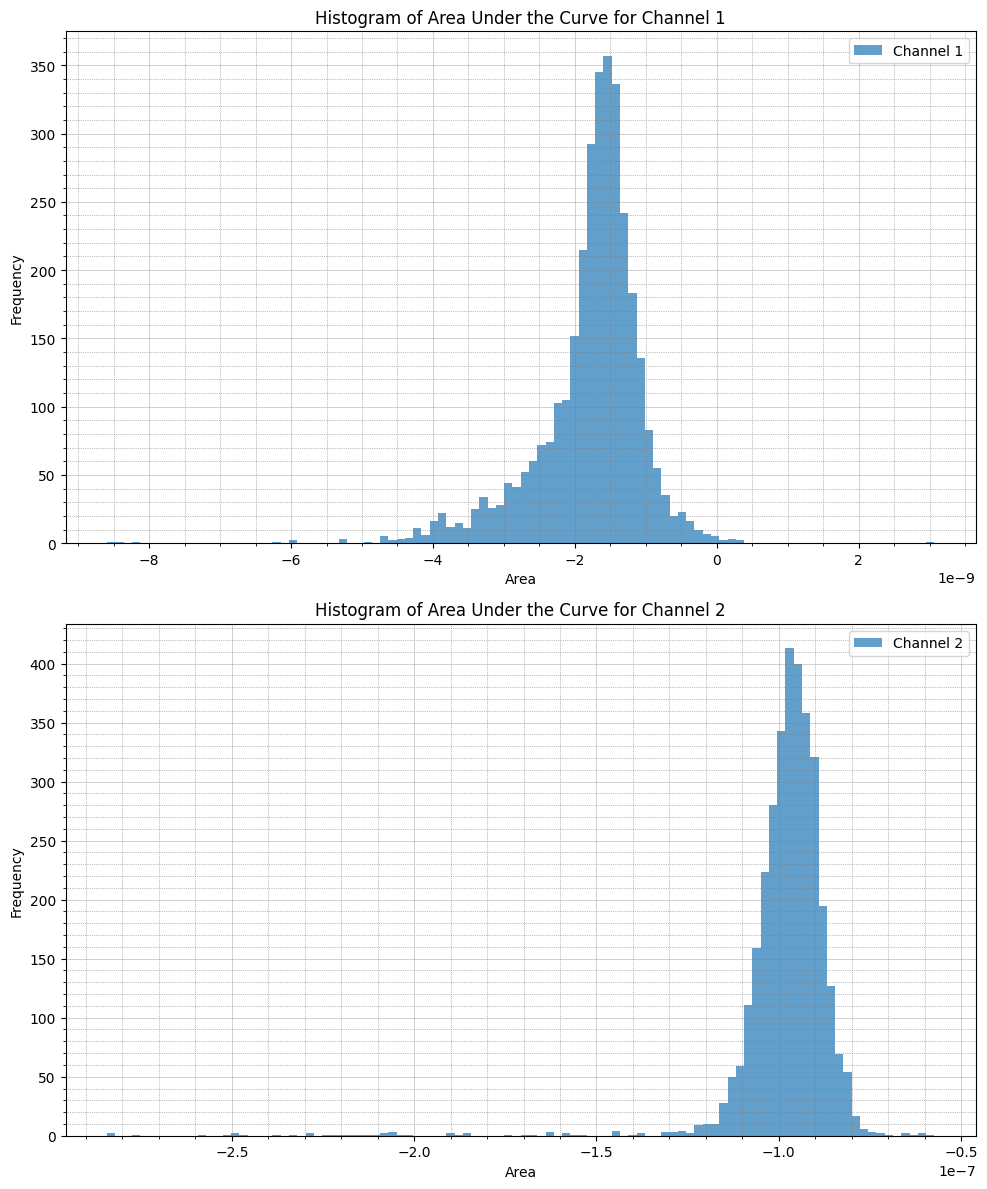

In [28]:
import matplotlib.ticker as ticker


# Diccionario para almacenar las áreas bajo la curva de cada pulso
area_under_curve = {}

for channel, pulses in sorted(window_data.items()):
    area_under_curve[channel] = []
    for pulse_id, df in pulses.items():
        # Calcular el área usando el método del trapecio
        area = np.trapz(df['Amplitude'], df['Time'])
        area_under_curve[channel].append(area)

# Configurar la figura para el histograma
num_channels = len(area_under_curve)
fig, axes = plt.subplots(nrows=num_channels, ncols=1, figsize=(10, 6 * num_channels), squeeze=False)

# Asegurarse de que axes es iterable (importante si hay solo un canal)
if num_channels == 1:
    axes = [axes]

# Iterar sobre cada canal y su correspondiente eje
for ax, (channel, areas) in zip(axes.flatten(), area_under_curve.items()):
    ax.hist(areas, bins=100, alpha=0.7, label=f'Channel {channel}')
    ax.set_title(f'Histogram of Area Under the Curve for Channel {channel}')
    ax.set_xlabel('Area')
    ax.set_ylabel('Frequency')
    ax.legend()

    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=1)

# Ajustar el espaciado entre los subgráficos para evitar la superposición de etiquetas y títulos
plt.tight_layout()
plt.show()

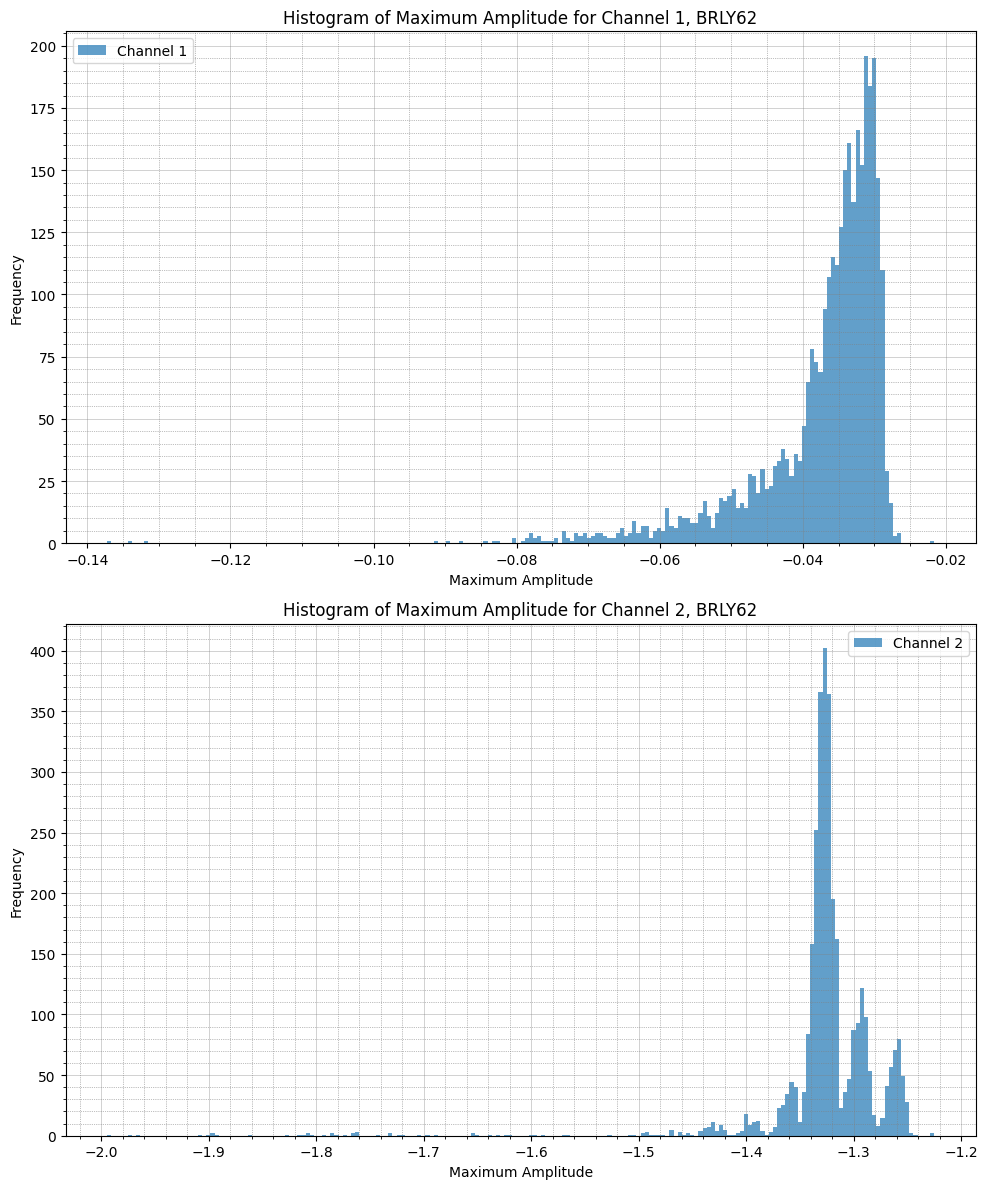

In [29]:
# Diccionario para almacenar las amplitudes máximas de cada pulso
max_amplitudes = {}

for channel, pulses in window_data.items():
    max_amplitudes[channel] = []
    for pulse_id, df in pulses.items():
        # Extraer la amplitud máxima de cada pulso
        max_amplitude = df['Amplitude'].min()
        max_amplitudes[channel].append(max_amplitude)

# Configurar la figura para el histograma
num_channels = len(max_amplitudes)
fig, axes = plt.subplots(nrows=num_channels, ncols=1, figsize=(10, 6 * num_channels), squeeze=False)

# Hacer 'axes' siempre un array de numpy usando flatten(), independientemente de la cantidad de canales
axes = axes.flatten()

# Iterar sobre cada canal y su correspondiente eje
for ax, (channel, amplitudes) in zip(axes, max_amplitudes.items()):
    ax.hist(amplitudes, bins=200, alpha=0.7, label=f'Channel {channel}')
    ax.set_title(f'Histogram of Maximum Amplitude for Channel {channel}, {folder_name}')
    ax.set_xlabel('Maximum Amplitude')
    ax.set_ylabel('Frequency')
    ax.legend()
     
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=1)

# Ajustar el espaciado entre los subgráficos para evitar la superposición de etiquetas y títulos
plt.tight_layout()
plt.show()

In [32]:
max_amplitudes = {}

for channel, pulses in window_data.items():
    max_amplitudes[channel] = []
    for pulse_id, df in pulses.items():
        max_amplitude = df['Amplitude'].min()
        max_amplitudes[channel].append(max_amplitude)

In [33]:
# Asumiendo que metricas_completas ya contiene los resultados de otros cálculos
for channel, pulses in sorted(window_data.items()):
    if channel not in metricas_completas:
        metricas_completas[channel] = {}
    for pulse_id, df in pulses.items():
        # Calcular el área usando el método del trapecio
        area = np.trapz(df['Amplitude'], df['Time'])
        if pulse_id not in metricas_completas[channel]:
            metricas_completas[channel][pulse_id] = {}
        metricas_completas[channel][pulse_id]['Area Under Curve'] = area

In [34]:
import uproot
import numpy as np

def guardar_histogramas_en_root(metricas_completas, folder_name, window_data):
    with uproot.update(f"{folder_name}.root") as f:
        for channel, metrics in metricas_completas.items():
            areas = [m['Area Under Curve'] for m in metrics.values()]  # Extraer áreas

            # Definir la ruta completa incluyendo la carpeta base y el canal
            channel_path = f"{folder_name}/channel_{channel}"

            # Crear directorio para cada canal si no existe, dentro de la carpeta base
            if channel_path not in f.keys():
                tree = f.mkdir(channel_path)
            else:
                tree = f[channel_path]

            # Convertir áreas a histograma y guardarlo en el directorio del canal
            min_area, max_area = min(areas), max(areas)
            histogram_areas = np.histogram(areas, bins=100, range=(min_area, max_area))

            # Añadir el histograma del área bajo la curva como una nueva hoja
            tree["area_under_curve"] = histogram_areas

            # Calcular amplitudes máximas
            max_amplitudes = [df['Amplitude'].min() for df in window_data[channel].values()]
            min_amplitude, max_amplitude = min(max_amplitudes), max(max_amplitudes)
            histogram_amplitudes = np.histogram(max_amplitudes, bins=200, range=(min_amplitude, max_amplitude))

            # Añadir el histograma de amplitud máxima como una nueva hoja
            tree["max_amplitude"] = histogram_amplitudes

# Ejemplo de uso
guardar_histogramas_en_root(metricas_completas, folder_name, window_data)